# Severity Estimation of Covid-19 Patients using Machine Learning to Assist Hospital Bed Allocation

## Summary

During the Covid-19 pandemic, a severe shortage of hospital beds was seen across
many major cities of the world. Because of this, many individuals lost their lives. One of the major culprits which contributed to the situation was inefficient management of hospital bed allocation. Patients whose condition was not very severe were allocated hospital beds, whereas patients whose condition was severe were denied access to hospital care because the hospital beds were fully occupied. 

To tackle a situation where there is a sudden outburst of Covid-19 cases in any major city, and there is a urgent need of hospital beds, machine learning models can be used to streamline the process of bed allocation. Machine Learning models can be trained using the data from Covid-19 patients to estimate the severity of patients and classify them as to whether they require hospitalization or not. The age, gender and pre-existing comorbidities of the patient are considered for determining the severity and requirement of hospitalization.

## Dataset

The dataset has been obtained from the open source dataset published by the General Directorate of Epidemiology of the Mexican Government.

Link: https://www.gob.mx/salud/documentos/datos-abiertos-152127

## Columns

1. Sex: Gender of the patient (Female - 1, Male - 2)
2. Date of Death: Date on which patient died. If the patient did not die, then date is `9999-99-99`
3. Intubed: Whether the patient was on ventilator support (True - 1, False - 2, Missing data - 97, 98, 99)
4. Pneumonia: Whether the patient was diagnosed with pneumonia (True - 1, False - 2, Missing data - 97, 98, 99)
5. Age: Age of the patient
6. Pregnant: Whether the patient was pregnant (True - 1, False - 2, Missing data - 97, 98, 99)
7. Diabetes: Whether the patient was diabetic (True - 1, False - 2, Missing data - 97, 98, 99)
8. COPD: Whether the patient was suffering from chronic obstructive pulmonary disease (True - 1, False - 2, Missing data - 97, 98, 99)
9. Asthma: Whether the patient was suffering from asthma (True - 1, False - 2, Missing data - 97, 98, 99)
10. Hypertension: Whether the patient was suffering from hypertension (True - 1, False - 2, Missing data - 97, 98, 99)
11. Cardiovascular: Whether the patient was suffering from any cardiovascular diseases or disorders (True - 1, False - 2, Missing data - 97, 98, 99)
12. Obesity: Whether the patient was obese (True - 1, False - 2, Missing data - 97, 98, 99)
13. Renal_Chronic: Whether the patient was suffering from any kidney related disorders (True - 1, False - 2, Missing data - 97, 98, 99)
14. Smoker: Whether the patient was a smoker (True - 1, False - 2, Missing data - 97, 98, 99)
15. ICU: Whether the patient underwent treatment in ICU (True - 1, False - 2, Missing data - 97, 98, 99)

## Table of Contents

1. [Initial Steps](#section-1)
2. [Pre-processing](#section-2)
3. [Data Visualization](#section-3)
4. [Feature Engineering](#section-4)
5. [Training the Model](#section-5)
6. [Final Steps](#section-6)

## 1. Initial Steps <a id="section-1"></a>

In this section, the required libraries are imported. Once the libraries are imported, a partially cleaned dataset is read from Google Drive. Then, the first few rows of the data set are viewed and the number of rows and columns is viewed.

### 1.1. Import the necessary libraries

Various python libraries are imported to perform data manipulation, training machine learning models, performing feature engineering, etc. The `numpy` library is used for performing numerical operations on arrays. The `pandas` library is used for storing the dataset in the form of a table and is also used for manipulating the dataset. The `scikit-learn` library features various classification and regression algorithms which are used for training the machine learning  models.

In [1]:
import numpy
import pandas

import joblib

from google.colab import drive

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier   

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

from imblearn.under_sampling import NearMiss

import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Mount Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### 1.3. Read data from CSV file

In [3]:
data = pandas.read_csv('drive/MyDrive/covid_project/cleaned_data.csv')

### 1.4. View information about columns of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220147 entries, 0 to 1220146
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Sex             1220147 non-null  int64 
 1   Date of Death   1220147 non-null  object
 2   Intubed         1220147 non-null  int64 
 3   Pneumonia       1220147 non-null  int64 
 4   Age             1220147 non-null  int64 
 5   Pregnant        1220147 non-null  int64 
 6   Diabetes        1220147 non-null  int64 
 7   COPD            1220147 non-null  int64 
 8   Asthma          1220147 non-null  int64 
 9   Hypertension    1220147 non-null  int64 
 10  Cardiovascular  1220147 non-null  int64 
 11  Obesity         1220147 non-null  int64 
 12  Renal_Chronic   1220147 non-null  int64 
 13  Smoker          1220147 non-null  int64 
 14  ICU             1220147 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 139.6+ MB


### 1.5. View first few rows of the dataset

In [5]:
data.head()

,Sex,Date of Death,Intubed,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Hypertension,Cardiovascular,Obesity,Renal_Chronic,Smoker,ICU
0,2,9999-99-99,2,2,10,97,2,2,2,2,2,1,2,2,2
1,2,9999-99-99,1,2,14,97,2,2,2,2,2,2,2,2,2
2,1,2020-07-19,2,1,33,2,98,98,98,98,98,98,98,98,2
3,2,9999-99-99,2,1,60,97,1,2,2,2,2,2,2,2,1
4,1,9999-99-99,2,2,49,2,2,2,2,2,2,2,2,2,2


### 1.6. View the number of rows and columns in the dataset

In [6]:
data.shape

(1220147, 15)

## 2. Pre-processing <a id="section-2"></a>

In this section, pre-processing is performed on the dataset. The rows with missing values are handled. Replacement of values is performed and One-hot Encoding is performed on the Sex column.

### 2.1. Count the number of unknown records in each column in the dataset

The percentage of missing data in each column is calculated.

Observation: A very small number of rows contains missing values. Hence, these columns can be dropped withot a significant loss of data. Since, the Pregnant column contains a large number of missing values, it is retained and missing values are considered to be False and are set to 0.

In [7]:
true_false_columns = ['Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'COPD', 'Asthma', 'Hypertension', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Smoker', 'ICU']

for column in true_false_columns:
    total_unknown = len(data[data[column] == 97])+len(data[data[column] == 98])+len(data[data[column] == 99])
    print('%s: %f%%' % (column, (total_unknown/len(data[column]))*100))

Intubed: 1.121914%
Pneumonia: 0.724913%
Pregnant: 55.858597%
Diabetes: 0.388314%
COPD: 0.357170%
Asthma: 0.342991%
Hypertension: 0.366349%
Cardiovascular: 0.362169%
Obesity: 0.319634%
Renal_Chronic: 0.349056%
Smoker: 0.368070%
ICU: 1.125930%


### 2.2. Replace the Existing values with New values

Since most columns represent True/False information, they are replaced with 1/0 values where 1 represents True and 0 represents False.

In [8]:
true_false_columns = ['Intubed', 'Pneumonia', 'Diabetes', 'COPD', 'Asthma', 'Hypertension', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Smoker', 'ICU']

data['Pregnant'].replace([2, 97, 98, 99], 0, inplace = True)

for column in true_false_columns:
    if column == 'Pregnant':
        continue
        
    data[column].replace([2], 0, inplace=True)

    data.drop(data[data[column] == 97].index, inplace=True)
    data.drop(data[data[column] == 98].index, inplace=True)
    data.drop(data[data[column] == 99].index, inplace=True)

### 2.3. Replace Age values with Integer values

In the dataset, Age is represented using string data type and hence are converted to integer.

In [9]:
data['Age'] = data['Age'].astype(str).astype(int)

### 2.4. Replace Death Dates with True/False values

The dates of patients who survived the infection is set to `9999-99-99` in the dataset. Hence, the value `9999-99-99` is replaced with 0 and the remaining values are replaced with 1.

In [10]:
data.loc[data['Date of Death'] == '9999-99-99', 'Date of Death'] = 0
data.loc[data['Date of Death'] != 0, 'Date of Death'] = 1

data.rename(columns={'Date of Death': 'Death'}, inplace=True)

### 2.5. Replace Sex Column with Separate Columns for each Gender and drop Sex Column

One-Hot Encoding is performed on the Sex column. New columns, Male and Female are inserted into the dataframe. The Male and Female columns are True/False columns where True is represented using 1 and False is represented using 0.

In [11]:
data['Male'] = 0
data['Female'] = 0

data.loc[data['Sex'] == 2, 'Male'] = 1
data.loc[data['Sex'] == 1, 'Female'] = 1

data.drop(['Sex'], axis=1, inplace=True)

## 3. Data Visualization <a id="section-3"></a>

In this section, data visualization is performed using the `matplotlib` and `seaborn` libraries, for analysing the dataset and making observations on the dataset.

### 3.1. Distribution of Gender, Deaths, ICU and Ventilator Requirement

Observation: There is an imbalance in the classification of patients who have died and patients who have survived. This is not unusual since the fatality rate of Covid-19 is not very high.

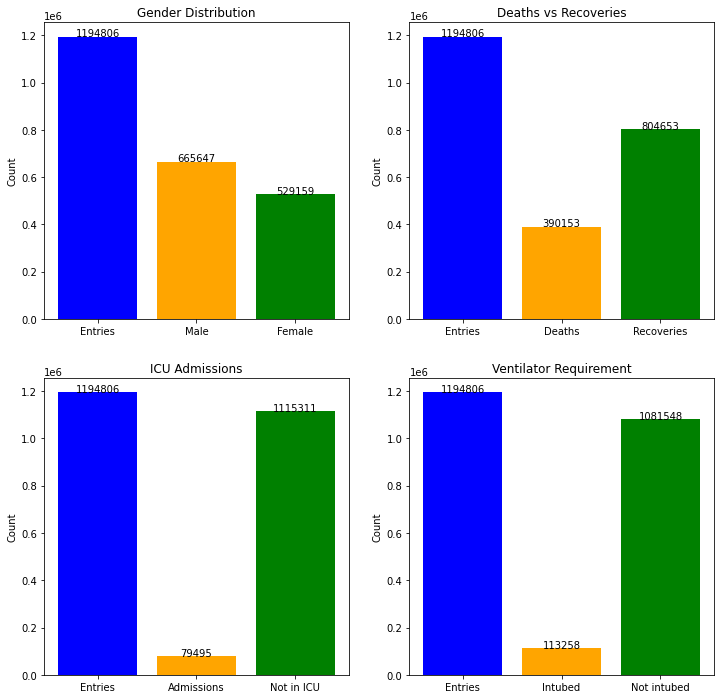

In [12]:
plt.figure(figsize=[12, 12])

n = len(data)

# Gender Distribution
male = data['Male'].value_counts()[1]
female = data['Female'].value_counts()[1]

x = ["Entries", "Male", "Female"]
y = [n, male, female]

plt.subplot(2, 2, 1)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.bar(x, y, color=["blue", "orange", "green"])

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')

# Death vs Recoveries
deaths = data['Death'].value_counts()[1]

x = ["Entries", "Deaths", "Recoveries"]
y = [n, deaths, n-deaths]

plt.subplot(2, 2, 2)
plt.title('Deaths vs Recoveries')
plt.ylabel('Count')
plt.bar(x, y, color=["blue", "orange", "green"])

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')

# ICU Admissions
admissions = data['ICU'].value_counts()[1]
not_admissions = data['ICU'].value_counts()[0]

x = ['Entries', 'Admissions', 'Not in ICU']
y = [n, admissions, not_admissions]

plt.subplot(2, 2, 3)
plt.title('ICU Admissions')
plt.ylabel('Count')
plt.bar(x, y, color=["blue", "orange", "green"])

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')

# Ventilator Requirement
admissions = data['Intubed'].value_counts()[1]
not_admissions = data['Intubed'].value_counts()[0]

x = ['Entries', 'Intubed', 'Not intubed']
y = [n, admissions, not_admissions]

plt.subplot(2, 2, 4)
plt.title('Ventilator Requirement')
plt.ylabel('Count')
plt.bar(x, y, color=["blue", "orange", "green"])

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')

plt.show()

### 3.2. Distribution of the pre-existing comorbidities across the dataset

Observation: A large number of patients were diagnosed with Pneumonia during the infection. A great fraction of patients suffered from diabetes, hypertension and obesity.

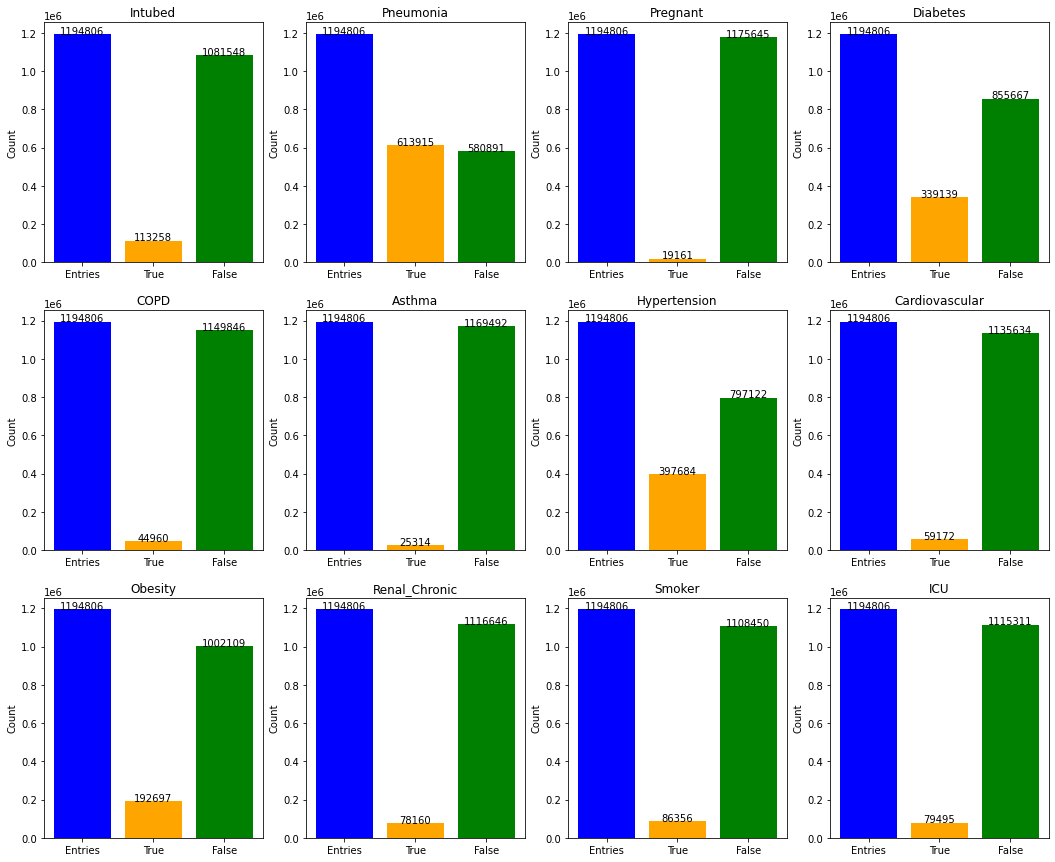

In [13]:
plt.figure(figsize=[18, 15])

true_false_columns = ['Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'COPD', 'Asthma', 'Hypertension', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Smoker', 'ICU']

for i in range(0, len(true_false_columns)):
    true_values = data[true_false_columns[i]].value_counts()[1]
    false_values = data[true_false_columns[i]].value_counts()[0]

    x = ['Entries', 'True', 'False']
    y = [n, true_values, false_values]

    plt.subplot(3, 4, i+1)
    plt.title(true_false_columns[i])
    plt.ylabel('Count')
    plt.bar(x, y, color=['blue', 'orange', 'green'])

    for j in range(len(x)):
        plt.text(j, y[j], y[j], ha = 'center')

plt.show()

### 3.3. Distribution of Deaths, Intubations and ICU requirement according to Pre-existing comorbidities

Observation: A large number of patients who suffered from pre-existing comorbidities did not survive. A very small number of women who were pregnant did not survive. Most patients who suffered from pre-existing comorbidities required hospitalization.

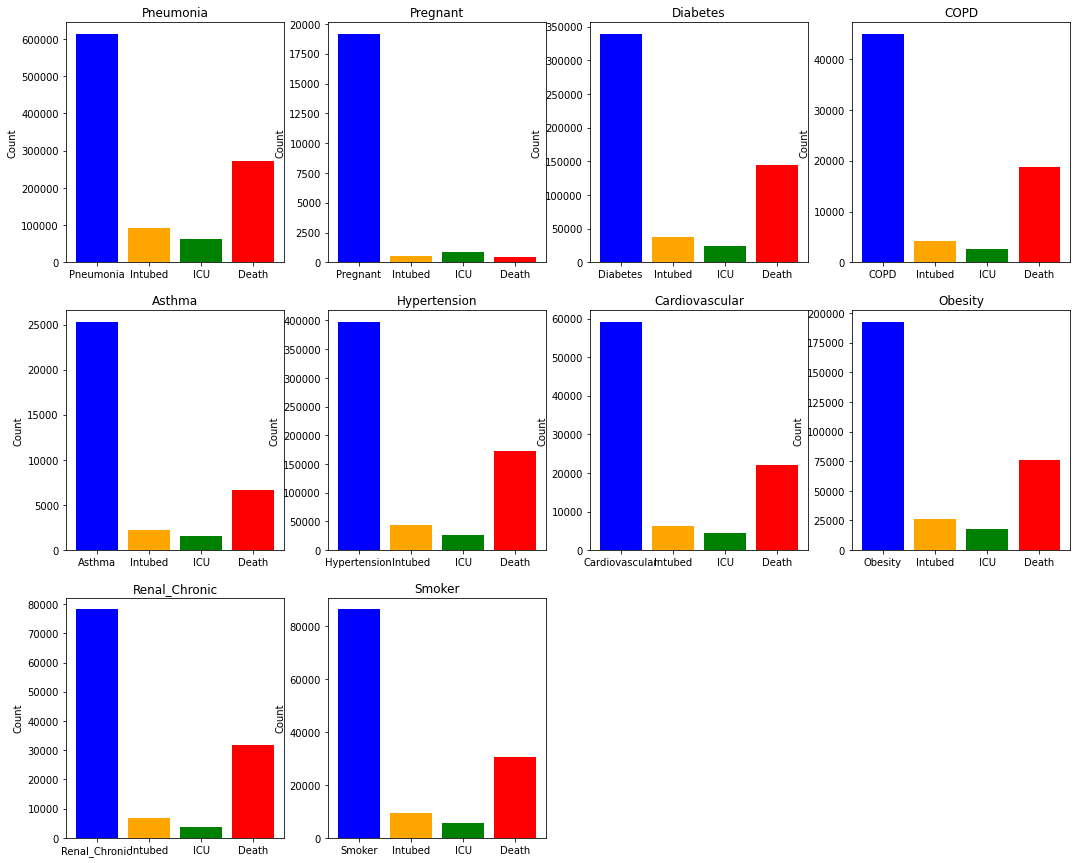

In [14]:
plt.figure(figsize=[18, 15])

true_false_columns = ['Pneumonia', 'Pregnant', 'Diabetes', 'COPD', 'Asthma', 'Hypertension', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Smoker']
result_columns = ['Intubed', 'ICU', 'Death']

for i in range(0, len(true_false_columns)):
    true_values = data[true_false_columns[i]].value_counts()[1]
    intubed = len(data[(data[true_false_columns[i]] == 1) & (data['Intubed'] == 1)])
    icu = len(data[(data[true_false_columns[i]] == 1) & (data['ICU'] == 1)])
    death = len(data[(data[true_false_columns[i]] == 1) & (data['Death'] == 1)])

    x = [true_false_columns[i], 'Intubed', 'ICU', 'Death']
    y = [true_values, intubed, icu, death]

    plt.subplot(3, 4, i+1)
    plt.title(true_false_columns[i])
    plt.ylabel('Count')
    plt.bar(x, y, color=['blue', 'orange', 'green', 'red'])

plt.show()

### 3.4. Distribution of Deaths, Intubations and ICU Admissions according to Age Groups

Observation: The requirement of ventilators and ICU increased with the increase in the age of the patient. The number of deaths of patients in the age groups with age greater than 40 is very high.

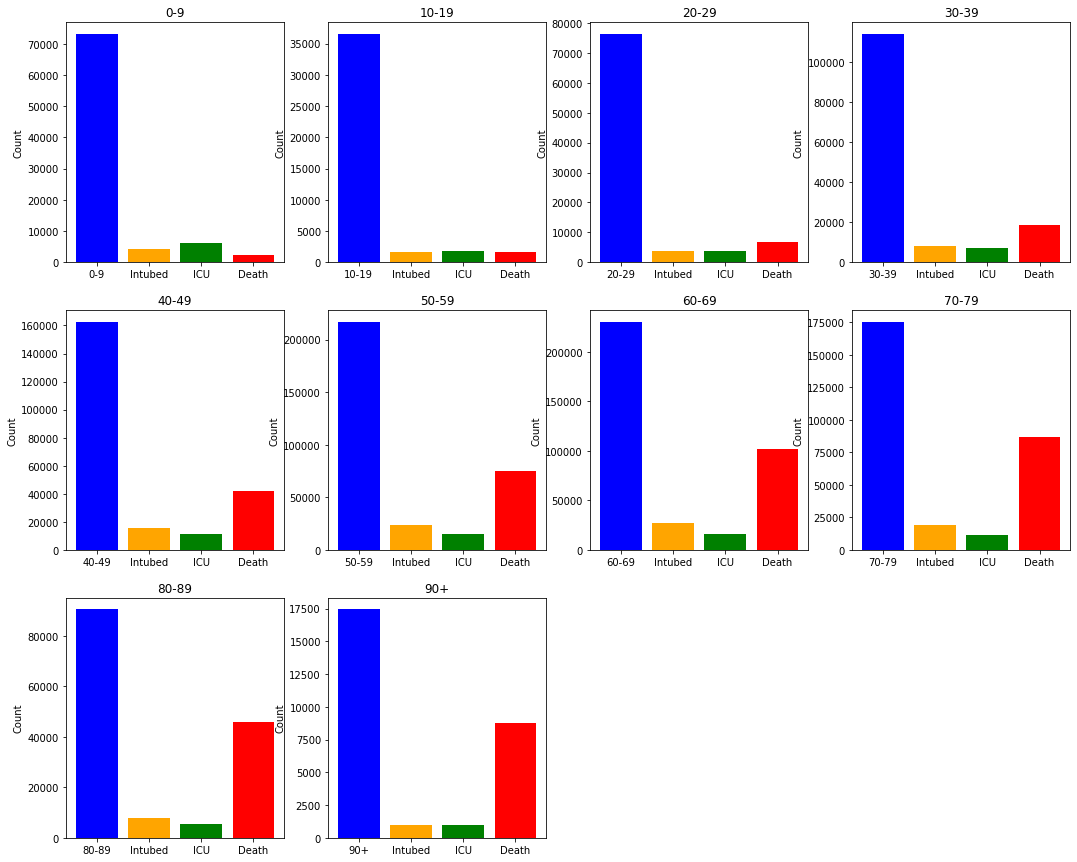

In [15]:
plt.figure(figsize=[18, 15])

age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
result_columns = ['Intubed', 'ICU', 'Death']

for i in range(0, len(age_groups)):
    low_lim = i*10
    up_lim = ((i+1)*10)-1
    
    age_group_count = len(data[(data['Age'] >= low_lim) & (data['Age'] <= up_lim)])
    intubed = len(data[(data['Age'] >= low_lim) & (data['Age'] <= up_lim) & (data['Intubed'] == 1)])
    icu = len(data[(data['Age'] >= low_lim) & (data['Age'] <= up_lim) & (data['ICU'] == 1)])
    death = len(data[(data['Age'] >= low_lim) & (data['Age'] <= up_lim) & (data['Death'] == 1)])

    x = [age_groups[i], 'Intubed', 'ICU', 'Death']
    y = [age_group_count, intubed, icu, death]

    plt.subplot(3, 4, i+1)
    plt.title(age_groups[i])
    plt.ylabel('Count')
    plt.bar(x, y, color=['blue', 'orange', 'green', 'red'])

plt.show()

### 3.5. Correlation Heatmap

Observation: ICU and Ventilator requirements for patients with pre-existing comorbidities is high and is significantly higher in patients diagnosed with pneumonia.

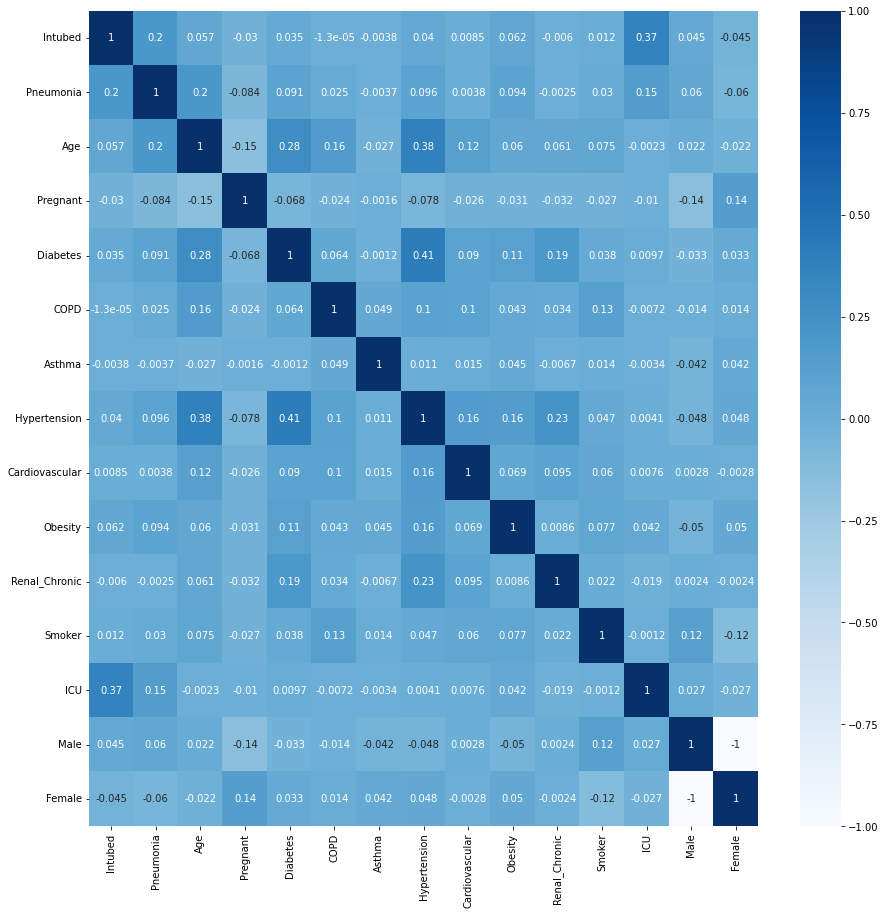

In [16]:
plt.figure(figsize=[15, 15])
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.show()

### 3.6. Seperate the result and data and drop the columns

Those patients who died, underwent treatment in ICU and were on ventilator support are considered as patients who require hospitalization and are clubbed into the same column. Hence, that is the result column.

In [17]:
data.loc[data['ICU'] == 1, 'Death'] = 1
data.loc[data['Intubed'] == 1, 'Death'] = 1

result = data['Death']

true_val = result.value_counts()[1]
false_val = result.value_counts()[0]

data.drop(['Death', 'ICU', 'Intubed'], axis=1, inplace=True)

result = list(result)

## 4. Feature Engineering <a id="section-4"></a>

In this section, under sampling is performed on the dataset which contains a greater number of patients classified as "Does not require Hospitalization"

### 4.1. Under Sampling

Under Sampling is used to used to reduce the number of samples from the majority class to match the number of samples in the minority class

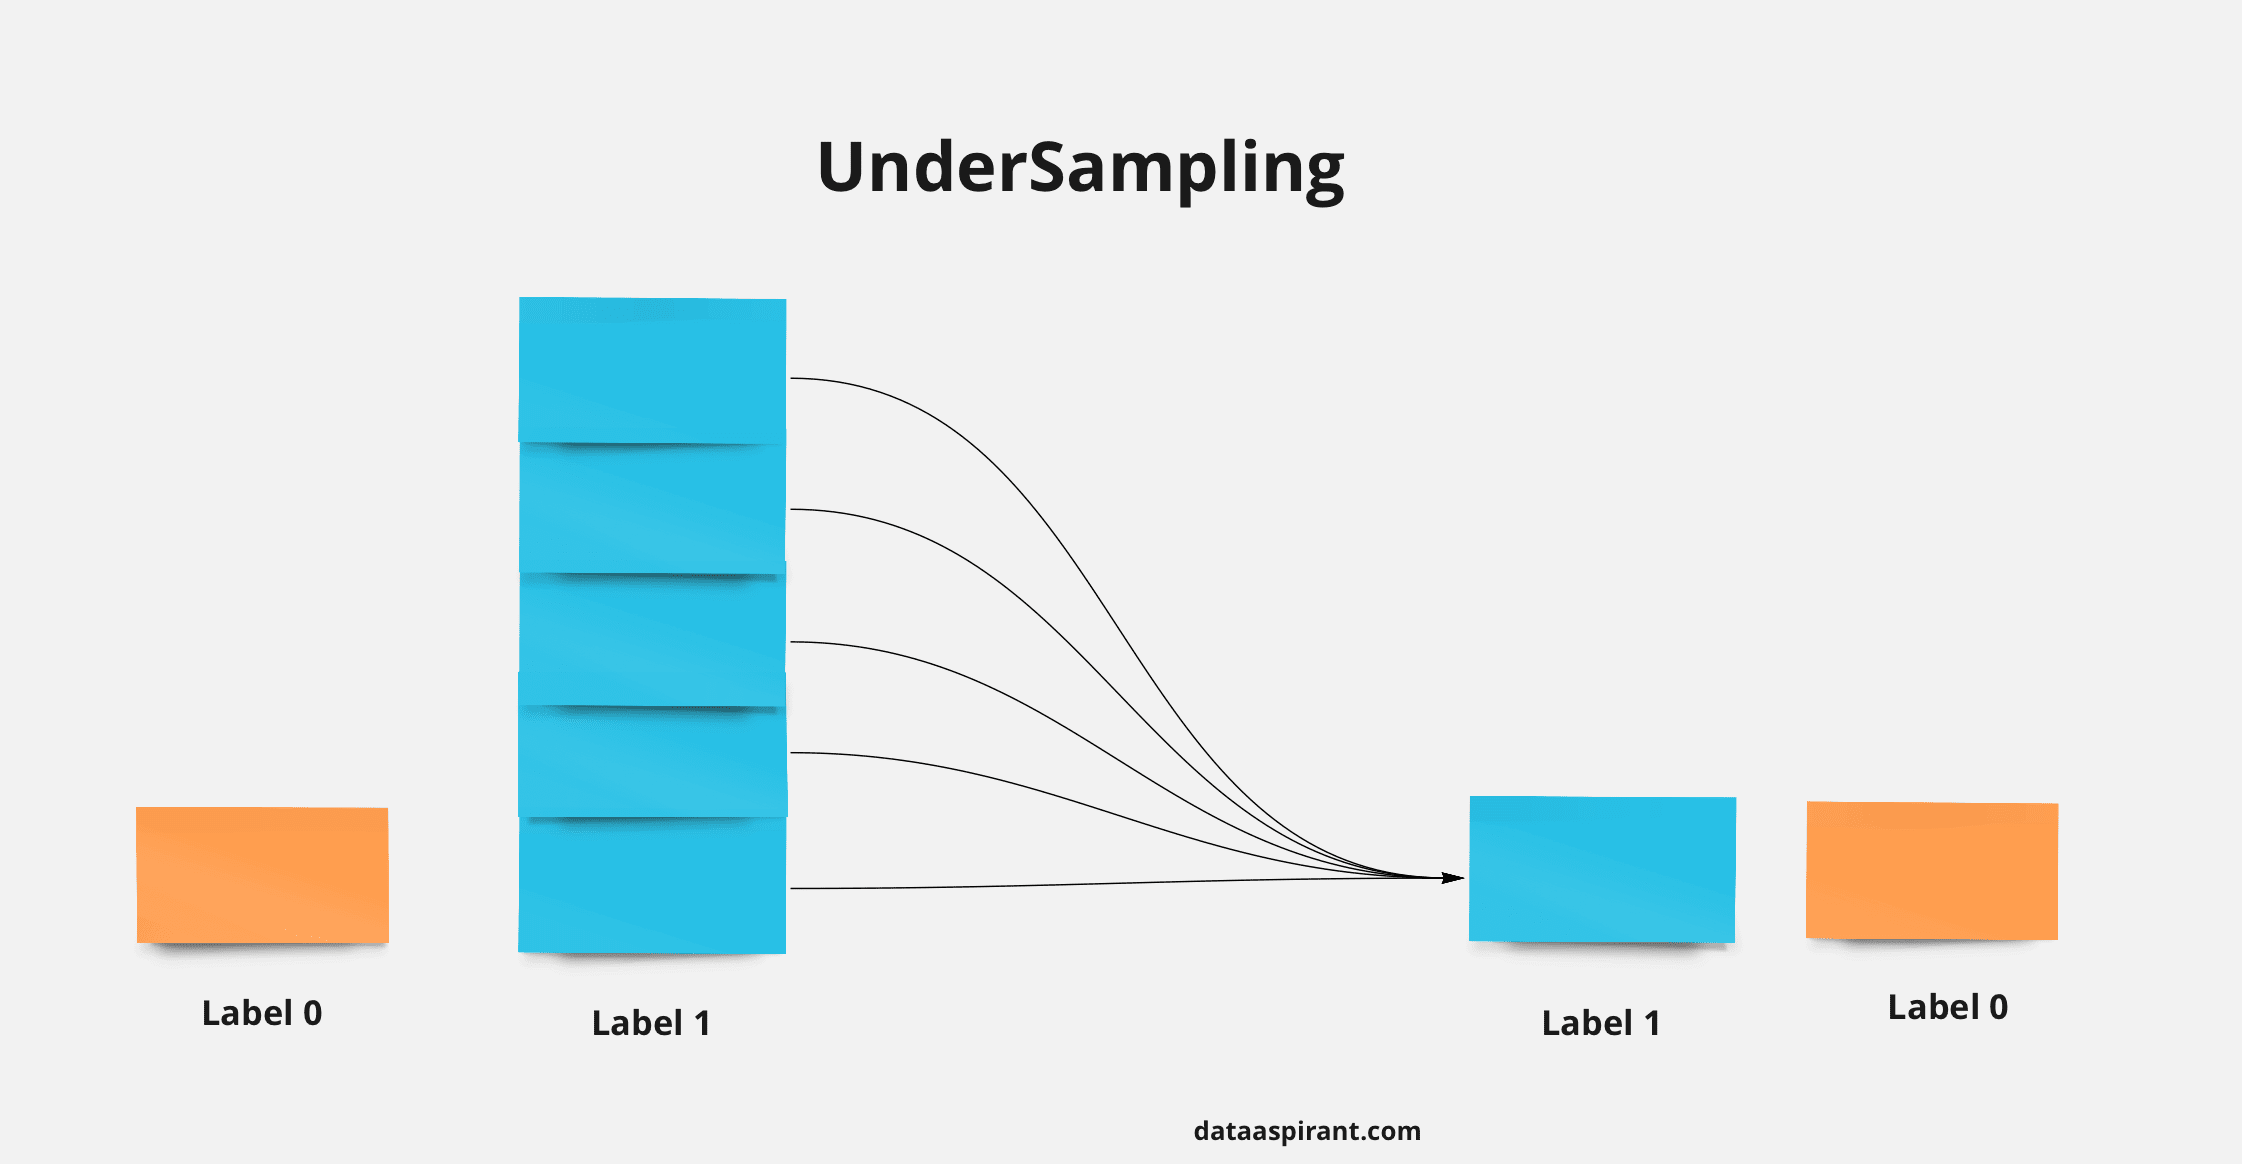

The NearMiss algorithm is used in this project for performing undersampling on the dataset. The NearMiss algorithm eliminates the samples of the majority class which are closer to the minority class in the distribution.

In [18]:
undersample = NearMiss(version=1, n_neighbors=3)
data, result = undersample.fit_resample(data, result)

### 4.2. View the number of rows and columns in the dataset

In [19]:
data.shape

(890502, 13)

## 5. Training the Model <a id="section-5"></a>

In this section, different algorithms are used to train the machine learning models. Classification algorithms are used to train classification models which predict True/False values. Regression algorithms are used to train regression models which estimate the severity of the patient, where the value of the prediction increases with severity.

### 5.1. Split the data into train and test set

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(data, result, test_size = 0.2)

### 5.2. Naive Bayes Classifier

Observation: The number of false negatives is really high. This means that patients who may be in need of hospitalization are labelled as "Not required", which is the opposite of the desired outcome.

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)

print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
print('\nClassification report:\n', classification_report(Y_test, Y_pred))
print('\nAccuracy:', accuracy_score(Y_test, Y_pred))

Confusion matrix:
 [[57266 31971]
 [35932 52932]]

Classification report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63     89237
           1       0.62      0.60      0.61     88864

    accuracy                           0.62    178101
   macro avg       0.62      0.62      0.62    178101
weighted avg       0.62      0.62      0.62    178101


Accuracy: 0.6187388055092335


### 5.3. Random Forest Classifier

Observation: Accuracy is better. The number of false negatives is lower.

In [22]:
rfc = RandomForestClassifier(n_estimators=10, criterion="entropy")  
rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
print('\nClassification report:\n', classification_report(Y_test, Y_pred))
print('\nAccuracy:', accuracy_score(Y_test, Y_pred))

Confusion matrix:
 [[54742 34495]
 [28266 60598]]

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.64     89237
           1       0.64      0.68      0.66     88864

    accuracy                           0.65    178101
   macro avg       0.65      0.65      0.65    178101
weighted avg       0.65      0.65      0.65    178101


Accuracy: 0.6476100639524764


### 5.4. Decision Tree Classifier

Observation: Accuracy is good. The number of false negatives is low. But, the performance is not as good as that of Random Forest Classifier

In [23]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)  
dtc.fit(X_train, Y_train) 

Y_pred = dtc.predict(X_test)

print('Confusion matrix:\n', confusion_matrix(Y_test, Y_pred))
print('\nClassification report:\n', classification_report(Y_test, Y_pred))
print('\nAccuracy:', accuracy_score(Y_test, Y_pred))

Confusion matrix:
 [[55031 34206]
 [28954 59910]]

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64     89237
           1       0.64      0.67      0.65     88864

    accuracy                           0.65    178101
   macro avg       0.65      0.65      0.65    178101
weighted avg       0.65      0.65      0.65    178101


Accuracy: 0.6453697621012796


### 5.4. Simple Linear Regression

In [24]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

Y_pred = linear_regressor.predict(X_test)

print('Mean absolute error of Simple Linear Regression:', mean_absolute_error(Y_test, Y_pred))

Mean absolute error of Simple Linear Regression: 0.4398251490220728


### 5.5. Random Forest Regressor

In [25]:
random_forest_regressor = RandomForestRegressor(n_estimators = 15)
random_forest_regressor.fit(X_train, Y_train)

Y_pred = random_forest_regressor.predict(X_test)

print('Mean absolute error of Random Forest Regressor:', mean_absolute_error(Y_test, Y_pred))

Mean absolute error of Random Forest Regressor: 0.428824032504937


### 5.6. Decision Tree Regressor

In [26]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

Y_pred = decision_tree_regressor.predict(X_test)

print('Mean absolute error of Decision Tree Regressor:', mean_absolute_error(Y_test, Y_pred))

Mean absolute error of Decision Tree Regressor: 0.4282500295202604


## 6. Final Steps <a id="section-6"></a>

Out of the three classification models, the Random Forest Classifier gave the best results. The accuracy was better than the other models and the false negatives was lower compared to the other models. Hence, the Random Forest Classifier seems appropriate for the prediction.

The mean value errors of the three regression models do not differ by a large margin. Hence, Linear Regression is used since it is a simpler model and the severity is largely determined by age, which increases as the age increases.

### 6.1. Train the Classification Model

In [27]:
Classification_model = RandomForestClassifier(n_estimators=10, criterion="entropy") 
Classification_model.fit(data, result) 
joblib.dump(Classification_model, 'drive/MyDrive/covid_project/Classification_model.sav')

['drive/MyDrive/covid_project/Classification_model.sav']

### 6.2. Train the Regression model

In [28]:
Regression_model = LinearRegression()
Regression_model.fit(data, result)
joblib.dump(Regression_model, 'drive/MyDrive/covid_project/Regression_model.sav')

['drive/MyDrive/covid_project/Regression_model.sav']